In [72]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [84]:
job_name = "md_weight_temp"

bench_dir = Path(Path.home(), "Documents/xray/sample_benchmark")
job_dir = Path(bench_dir, job_name)
log_file = Path(job_dir, "output_5/log.csv")
log_df = pd.read_csv(log_file)

log_df.head()


,Unnamed: 0,step,time,ff,xray,df_mag,RMSD
0,0,0,2.396831,524.931096,4.087112,1866.532724,0.055790
1,1,1,3.195777,639.438665,4.299023,2139.043475,0.070871
2,2,2,3.974484,523.936692,4.418740,1596.224065,0.083656
3,3,3,4.766812,414.487770,4.481761,883.819186,0.092590
4,4,4,5.550194,435.286608,4.524160,1189.476664,0.098969


In [85]:
plot_terms = ["RMSD", "df_mag", "xray", "ff"]

if len(plot_terms)%2 == 0: 
    n_rows = len(plot_terms)//2
else: 
    n_rows = len(plot_terms)//2+1 
    
n_cols = 2


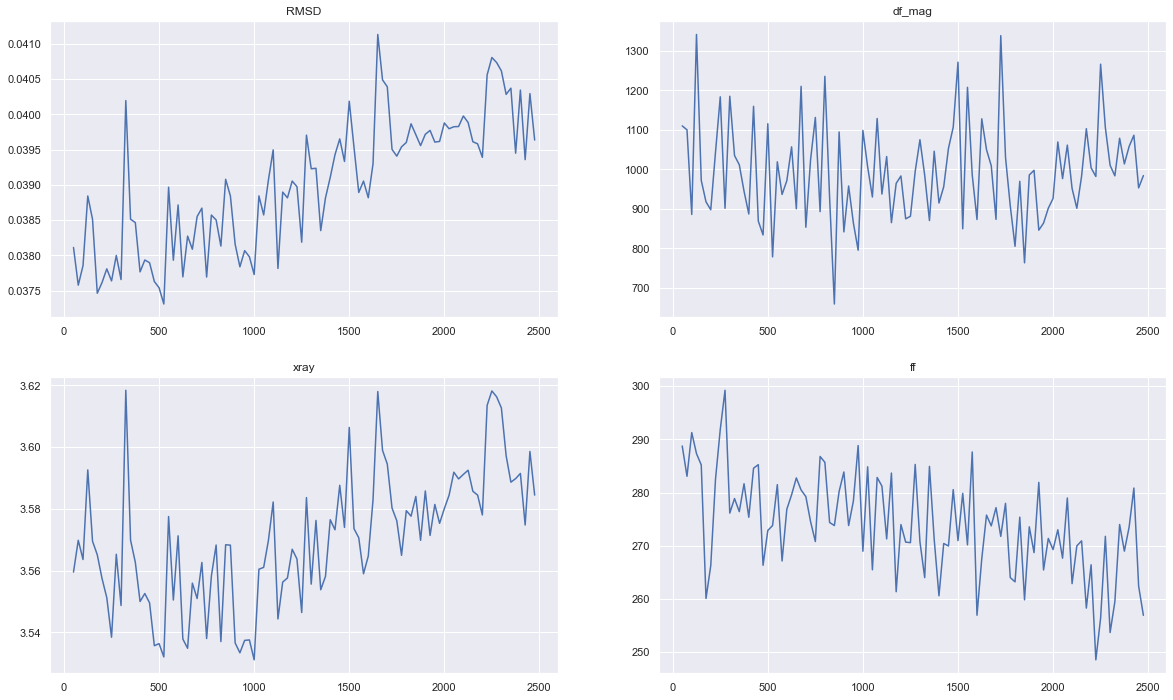

In [91]:
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20,6*n_rows))

for i in range(len(plot_terms)):
    term = plot_terms[i]
    if len(plot_terms) > 2: 
        ax = axs[i//2][i%2]
    else: 
        ax = axs[i]
    
    ax.title.set_text(term)
        
    plot_x = list(log_df["step"])
    plot_y = list(log_df[term])
    
    burn_n = len(plot_x)//50
    
#     ax.set_ylim([ymin, ymax])
    ax.plot(plot_x[burn_n::25], plot_y[burn_n::25])
    
plt.show()
# plt.savefig(Path(job_dir, "plots/ff.png"))
